In [1]:
#to turn off warnings
options(warn=-1)

In [2]:
#read data
data=read.csv("churn_data.csv")
newData=data[,-c(1,2,3)]

In [3]:
head(newData)

international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no


In [4]:
tail(newData)

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4995,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4996,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4997,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,yes
4998,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
4999,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no
5000,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [5]:
#split data
library(caTools)
set.seed(2)
sample=sample.split(newData$churn,SplitRatio = 0.70)
trainData=subset(newData,sample==TRUE)
testData=subset(newData,sample==FALSE)

In [6]:
#data modelling
library(rpart)
model=rpart(churn~.,trainData)

Loading required package: tibble
Loading required package: bitops
Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


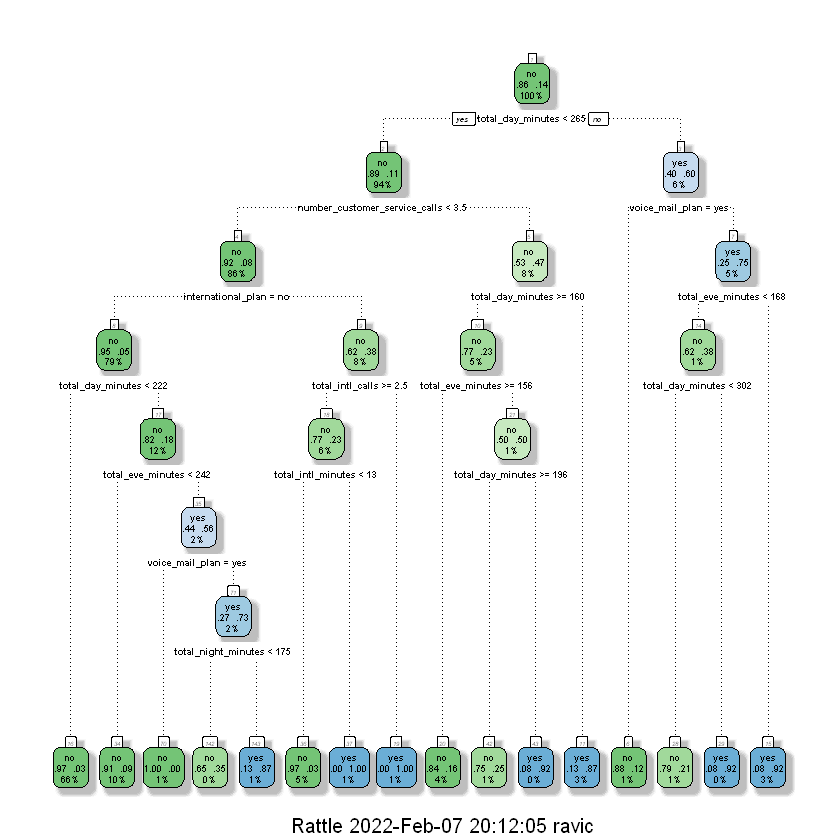

In [7]:
#plot tree
library(rattle)
library(rpart.plot)
fancyRpartPlot(model)

In [8]:
#make prediction
pred=predict(model,testData,type="class")
pred[c(1:5)]

5  6  8 14 18 
no no no no no 
Levels: no yes

In [9]:
#create confusion matrix
library(caret)
cm=confusionMatrix(as.factor(testData$churn),as.factor(pred))
cm

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1275   13
       yes   51  161
                                         
               Accuracy : 0.9573         
                 95% CI : (0.9458, 0.967)
    No Information Rate : 0.884          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.81           
                                         
 Mcnemar's Test P-Value : 3.746e-06      
                                         
            Sensitivity : 0.9615         
            Specificity : 0.9253         
         Pos Pred Value : 0.9899         
         Neg Pred Value : 0.7594         
             Prevalence : 0.8840         
         Detection Rate : 0.8500         
   Detection Prevalence : 0.8587         
      Balanced Accuracy : 0.9434         
                                         
       'Positive' Class : no             
                                         